In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import pickle

In [2]:
directory=r'dataset'
catagories=['covid-19','normal']

In [3]:
img_size=100
data=[]
for catagory in catagories:
    folder=os.path.join(directory,catagory)
    label=catagories.index(catagory)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
            

In [4]:
len(data)

200

In [5]:
data[0]

[array([[[ 51,  51,  51],
         [ 50,  50,  50],
         [ 50,  50,  50],
         ...,
         [ 48,  48,  48],
         [ 50,  50,  50],
         [ 49,  49,  49]],
 
        [[ 51,  51,  51],
         [ 48,  48,  48],
         [ 49,  49,  49],
         ...,
         [ 47,  47,  47],
         [ 48,  48,  48],
         [ 49,  49,  49]],
 
        [[ 50,  50,  50],
         [ 50,  50,  50],
         [ 49,  49,  49],
         ...,
         [ 47,  47,  47],
         [ 48,  48,  48],
         [ 48,  48,  48]],
 
        ...,
 
        [[174, 174, 174],
         [175, 175, 175],
         [177, 177, 177],
         ...,
         [155, 155, 155],
         [151, 151, 151],
         [151, 151, 151]],
 
        [[176, 176, 176],
         [175, 175, 175],
         [175, 175, 175],
         ...,
         [158, 158, 158],
         [152, 152, 152],
         [150, 150, 150]],
 
        [[172, 172, 172],
         [176, 176, 176],
         [175, 175, 175],
         ...,
         [157, 157, 157],
  

In [6]:
x=[]
y=[]
for features, labels in data:
    x.append(features)
    y.append(labels)

In [7]:
x=np.array(x)
y=np.array(y)

In [8]:
x.shape

(200, 100, 100, 3)

In [9]:
y.shape

(200,)

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [11]:
x_train.shape

(160, 100, 100, 3)

In [12]:
x_test.shape

(40, 100, 100, 3)

In [13]:
y_train.shape

(160,)

In [14]:
y_test.shape

(40,)

In [15]:
y_train[:5]

array([1, 0, 0, 1, 1])

In [16]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(catagories[y[index]])

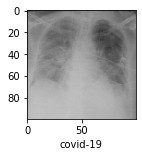

In [17]:
plot_sample(x_train, y_train, 6)

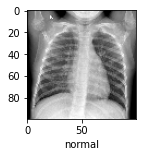

In [18]:
plot_sample(x_train, y_train,120 )

In [19]:
from cgan import CGAN

In [20]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [21]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense, Flatten
from keras.layers import Input, Dropout, multiply
from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
5/5 [==============================] - 3s 695ms/step - loss: 0.9369 - accuracy: 0.6000
Epoch 2/5
5/5 [==============================] - 4s 718ms/step - loss: 0.5489 - accuracy: 0.7812
Epoch 3/5
5/5 [==============================] - 3s 699ms/step - loss: 0.2472 - accuracy: 0.9438
Epoch 4/5
5/5 [==============================] - 4s 713ms/step - loss: 0.1284 - accuracy: 0.9438
Epoch 5/5
5/5 [==============================] - 4s 715ms/step - loss: 0.0975 - accuracy: 0.9625


In [25]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 35ms/step - loss: 0.1776 - accuracy: 0.9750


[0.17760471999645233, 0.9750000238418579]

In [26]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[9.8941761e-01, 1.0582435e-02],
       [8.7617163e-04, 9.9912387e-01],
       [9.9890018e-01, 1.0997499e-03],
       [9.8428094e-01, 1.5719106e-02],
       [3.7529616e-04, 9.9962473e-01]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 1, 0, 0, 1]

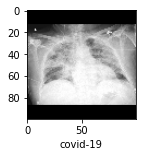

In [28]:
plot_sample(x_test, y_test, 10)

In [29]:
catagories[y_classes[10]]

'covid-19'